<a href="https://colab.research.google.com/github/billyotieno/textanalysis/blob/master/Group_5_PDS_kq_customer_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kenya Airways & Industry Airline Customer Reviews Analysis Notebook**


---
 
![Kenya Airways Image](https://www.kindpng.com/picc/m/337-3373993_kenya-airways-hd-png-download.png)

> ## **Introduction**   
> Kenya Airways receives airline reviews from trip advisors from both local, continental and international travellers. Their customer service team would like to extract insights from their customer reviews on TripAdvisor and conduct competitor analysis of the top 10 airlines from Skytrax Ranking to discover their competitive edge and where they fall short. 

> However, they need help analyzing reviews due to the large volume of customer reviews they have to go through manually. It's time-consuming and resource-intensive. Additionally, there’s a challenge in identifying common trends and themes in customer feedback, considering customers provide review feedback on a wide range of topics, e.g. quality of food to their in-flight experiences.

> In this notebook we will be using text mining and sentiment analysis to process and analyze customer reviews to help Kenya Airways overcome these challenges through Data Science & Analytics. This would allow the airline to quickly and efficiently gain insights from the data and identify common issues and trends in customer feedback. The airline could then use this information to improve its products and services and provide better support to its customers.

> ## **Dataset Source**   
> To meet the objectives of the analysis we've extracted Airline customer reviews feedback from TripAdvisor for Kenya Airways and the top 10 leading airlines in Africa by SkyTrack Ranking. This datasets will help us analyze reviews both at organization level (Kenya Airways) and how it compares to Industry (9 other airlines).

Datasets can be accessed through github repository via [This Link](https://github.com/billyotieno/analytics-datasets/tree/main/Transport%20Services/Airlines/african-airlines-reviews-dataset)


# **Table of Contents**

>[Kenya Airways & Industry Airline Customer Reviews Analysis Notebook](#scrollTo=jNpZkgLrpWiF)

>>[Introduction](#scrollTo=jNpZkgLrpWiF)

>>[Dataset Source](#scrollTo=jNpZkgLrpWiF)

>[Table of Contents](#scrollTo=DM0RD92SwuJF)

>>[Setting up and Installing Required Libraries](#scrollTo=5yvGfaTlygLb)

>>[Sourcing Data from the Github Respository](#scrollTo=j4rYvvQ61Ps7)

>>[Importing Required Libraries](#scrollTo=Yuqv8THG2ZXG)

>>[Loading Data into DataFrames](#scrollTo=sII_fRkJpVcT)

>>[Initial Data Exploration](#scrollTo=L6LOVnaX0mhI)

>>>[Renaming Columns to Clear Columns](#scrollTo=RdNUoUxq9XNA)

>>>[Checking Dataset Shape](#scrollTo=aB5iN376RWDo)

>>>[Checking DataTypes](#scrollTo=8WxPPNl0RcRH)

>>>[Checking for Missing Values](#scrollTo=8oOLLEXfRfj8)

>>>[Dataset Description](#scrollTo=pYf9YG2GRjIL)

>>>[Initial Data Cleaning: Overlapped Text](#scrollTo=n6Peyes6Rowq)

>>[Data Exploration: Focused on Non-Review Columns](#scrollTo=bO-JbEUMR30e)

>>>[Total Number of Reviews by Airlines](#scrollTo=xjZz7X0gRw9q)

>>>[Flight Types or Regions Travelled by Reviewers for Each Airline](#scrollTo=kZe6gvL1SO-T)

>>>[Distribution of Ratings (1 -5)](#scrollTo=dVmmWr8LSjsC)

>>>[Average Rating Across the Airlines for the Various Travel Classes](#scrollTo=aFC4ts_yTchJ)

>>>[Data Cleaning: Correcting Travel Month Column](#scrollTo=znqKrX7ZTtpb)

>>>[Exploring Review Ratings by Airline and Flight Travel Class](#scrollTo=FzY5o-D7T2cU)

>>>[Exploring Review Ratings by Airlines across Regions](#scrollTo=ET3DkYQyt0rf)

>>>[Breakdown of Airlines by Respective Travel Classes](#scrollTo=wvNVWzd8uk0Z)

>>[Data Exploration: Focused on Review Text](#scrollTo=R5Fe-nXgZ3G7)

>>>[Checking for NaNs in Extracted Review Columns](#scrollTo=3KTia-Ad8L6w)

>>>[Features distributions into Boolean, Categorical and Numerical types](#scrollTo=YvyCIsjiAseg)

>>>[Plotting the correlation matrix for the features](#scrollTo=6V63NJ4jBlXl)

>>[Data Quality Summary](#scrollTo=1ZosZNZ4mAvp)

>>[Data Preparation](#scrollTo=MqaDRPCsq64H)

>>>[1. Merging the two Datasets - Text Profiled & Non-Review Dataset](#scrollTo=zDXZ9KbArND8)

>>>[2. Removing Duplicate Rows](#scrollTo=clfUWwL0Yxqm)

>>>[3. Removing Redundant / Unrequired Columns - Select Data](#scrollTo=tYsbet3FXjwg)

>>>[4. Cleaning Travel Month & Year - Select Data](#scrollTo=FDt1YXyDc74S)

>>>[5. DataType Conversion](#scrollTo=gpXMSwBvsqE0)

>>>[6. Review Sentiment - New Column from Rating Scores](#scrollTo=0CBTTd-Da8RB)

>>[Data Preparation - Text Pre-processing for Reviews](#scrollTo=E8DIrwWyCFaj)

>>[Exploratory Data Analysis / Modelling](#scrollTo=GIFr98omeGvK)

>>>[Building a Quick Sentiment Classifier using CountVectorizer on Airline Reviews](#scrollTo=GIFr98omeGvK)

>>[Sentiment Analysis Modelling](#scrollTo=Vnr-y3BToI7t)

>>>[Using CountVectorizer & LogisticsRegression](#scrollTo=-_VuyN_IoYq9)

>>>[Using TfidfVectorizer & MultinomialNB Model](#scrollTo=BOtBTxWLkRhN)

>>[Topic Modelling](#scrollTo=G2zOuPa3oma5)

>>>[Displaying and Evaluating Topics](#scrollTo=1hTR__MCslGq)



## **Setting up and Installing Required Libraries**

In [1]:
# Installing required libraries (-q quiet installing all libraries)
! pip install -q pandas pandera numpy matplotlib seaborn textblob dask missingno wordcloud
! pip install -q fasttext 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2023-02-03 03:16:10--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘lid.176.bin’

lid.176.bin         100%[===================>] 125.18M  34.3MB/s    in 4.0s    

2023-02-03 03:16:15 (31.1 MB/s) - ‘lid.176.bin’ saved [131266198/131266198]



In [3]:
# Install pandas profiling - required for initial exporation
!pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 22.1 MB 22.8 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 15.2 MB/s eta 0:00:00


In [4]:
# Install NLP Profiler for text datasets
# !pip install -U -q git+https://github.com/neomatrix369/nlp_profiler@scale-when-applied-to-larger-datasets
# print("\n Installation Completed")

!pip install -U -q git+https://github.com/neomatrix369/nlp_profiler.git@master

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.1/783.1 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 34.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.4/386.4 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

## **Sourcing Data from the Github Respository**

In [5]:
from google.colab import files

# Create an airline-datasets directory on google colab to host the files
!rm -rf airline-datasets
!mkdir -p airline-datasets
!cd airline-datasets

# fetch all the datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/kenya_airways_flights.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/air_mauritius.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/egypt_airways.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/ethiopian_airlines.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/fastjet_flights.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/flysafair_flights.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/royal_air_maroc.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/rwand_air_flights.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/seychelles_airways.csv" -P ./airline-datasets
!wget -q --show-progress "https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport Services/Airlines/african-airlines-reviews-dataset/south_african_airways.csv" -P ./airline-datasets

kenya_airways_fligh 100%[===================>]   2.64M  --.-KB/s    in 0.07s   
air_mauritius.csv   100%[===================>]   1.46M  --.-KB/s    in 0.07s   
egypt_airways.csv   100%[===================>]   2.77M  --.-KB/s    in 0.07s   
ethiopian_airlines. 100%[===================>]   2.84M  --.-KB/s    in 0.07s   
fastjet_flights.csv 100%[===================>] 260.37K  --.-KB/s    in 0.03s   
flysafair_flights.c 100%[===================>] 919.14K  --.-KB/s    in 0.05s   
royal_air_maroc.csv 100%[===================>]   2.11M  --.-KB/s    in 0.06s   
rwand_air_flights.c 100%[===================>] 575.57K  --.-KB/s    in 0.04s   
seychelles_airways. 100%[===================>] 451.21K  --.-KB/s    in 0.04s   
south_african_airwa 100%[===================>]   2.97M  --.-KB/s    in 0.07s   


## **Importing Required Libraries**

In [6]:
# Import required libraries
import pandas as pd
import pandera as pn
import dask 
import seaborn as sns
import spacy
import re
import nltk
import string
import fasttext
import warnings
import inflect # converting numbers in text to words
import wordcloud
import missingno as msno
from pandas_profiling import ProfileReport
from nlp_profiler.core import apply_text_profiling

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import wordpunct_tokenize
import matplotlib.pyplot as plt

# Pandas settings
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 20)
pd.options.display.max_rows = 4000
from IPython.display import Image

%matplotlib inline
warnings.filterwarnings("ignore", category=DeprecationWarning)

# NLTK Download Options
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

<ipython-input-6-a81a00c0d904>:15: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
INFO:language_tool_python.download_lt:Unzipping /tmp/tmp0k506tdq.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /root/.cache/language_tool_python.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /r

True

In [7]:
# Visualization Fonts
!wget -O IBM_Sans.zip "https://fonts.google.com/download?family=IBM%20Plex%20Sans"
!wget -O McKinsey_Bower.zip "https://cdn.mckinsey.com/assets/fonts/web/Bower_Fonts.zip"

--2023-02-03 03:18:25--  https://fonts.google.com/download?family=IBM%20Plex%20Sans
Resolving fonts.google.com (fonts.google.com)... 172.253.123.138, 172.253.123.100, 172.253.123.101, ...
Connecting to fonts.google.com (fonts.google.com)|172.253.123.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘IBM_Sans.zip’

IBM_Sans.zip            [ <=>                ]   1.11M  --.-KB/s    in 0.06s   

2023-02-03 03:18:25 (19.4 MB/s) - ‘IBM_Sans.zip’ saved [1161709]

--2023-02-03 03:18:25--  https://cdn.mckinsey.com/assets/fonts/web/Bower_Fonts.zip
Resolving cdn.mckinsey.com (cdn.mckinsey.com)... 52.85.151.104, 52.85.151.121, 52.85.151.48, ...
Connecting to cdn.mckinsey.com (cdn.mckinsey.com)|52.85.151.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162944 (159K) [application/zip]
Saving to: ‘McKinsey_Bower.zip’

McKinsey_Bower.zip  100%[===================>] 159.12K  --.-KB/s    in 0.03s   

2023

In [8]:
!unzip -o '*.zip'

Archive:  McKinsey_Bower.zip
  inflating: Bower-Bold.woff2        
  inflating: __MACOSX/._Bower-Bold.woff2  
  inflating: Bower-Bold.woff         
  inflating: __MACOSX/._Bower-Bold.woff  
  inflating: Bower-Bold.eot          
  inflating: __MACOSX/._Bower-Bold.eot  
  inflating: Bower-Bold.otf          
  inflating: __MACOSX/._Bower-Bold.otf  

Archive:  IBM_Sans.zip
  inflating: OFL.txt                 
  inflating: IBMPlexSans-Thin.ttf    
  inflating: IBMPlexSans-ThinItalic.ttf  
  inflating: IBMPlexSans-ExtraLight.ttf  
  inflating: IBMPlexSans-ExtraLightItalic.ttf  
  inflating: IBMPlexSans-Light.ttf   
  inflating: IBMPlexSans-LightItalic.ttf  
  inflating: IBMPlexSans-Regular.ttf  
  inflating: IBMPlexSans-Italic.ttf  
  inflating: IBMPlexSans-Medium.ttf  
  inflating: IBMPlexSans-MediumItalic.ttf  
  inflating: IBMPlexSans-SemiBold.ttf  
  inflating: IBMPlexSans-SemiBoldItalic.ttf  
  inflating: IBMPlexSans-Bold.ttf    
  inflating: IBMPlexSans-BoldItalic.ttf  

2 archives we

In [9]:
!mv *.ttf /usr/share/fonts/truetype/
!mv *.otf /usr/share/fonts/truetype/

## **Loading Data into DataFrames**

In [10]:
from pathlib import Path 

path = "./airline-datasets/"
files = Path(path).glob('*.csv')

In [11]:
# Read data into dataframe with a new column identifying airline dataset
dfs = list()
for f in files:
  data = pd.read_csv(f, 
                     usecols=['Title','Image','Avatar_URL',
                              'crvsd','ui_header_link','default',
                              'phmbo','phmbo1','dmrsr','dmrsr2','dmrsr3',
                              'qwuub_URL','qwuub','tehyy','xcjrc',
                              'Rating'])
  data['source'] = f.stem
  dfs.append(data)

In [12]:
df = pd.concat(dfs, ignore_index=True)
df.head()

Title                Image           Avatar_URL  \
0  My return trip w...  https://media-cd...  https://www.trip...   
1  So we are freque...  https://media-cd...  https://www.trip...   
2  Flight FN8001 wa...  https://media-cd...  https://www.trip...   
3  The 10.30 flight...  https://media-cd...  https://www.trip...   
4  My boss was on t...  https://media-cd...  https://www.trip...   

                 crvsd ui_header_link              default              phmbo  \
0  Kufunda wrote a ...        Kufunda     Harare, Zimbabwe  355 contributions   
1  Mari Lopez wrote...     Mari Lopez                  NaN    2 contributions   
2  Noma_Omhle wrote...     Noma_Omhle  Goromonzi, Zimbabwe   42 contributions   
3  David L wrote a ...        David L                  NaN    2 contributions   
4  Anzelle wrote a ...        Anzelle                  NaN     1 contribution   

              phmbo1                dmrsr    dmrsr2   dmrsr3  \
0  118 helpful votes  Harare - Victori...  Domestic  Economy   
1                NaN  Harare - Victori...  Domestic  Economy   
2    7 helpful votes  Harare - Victori...  Domestic  Economy   
3     1 helpful vote  Victoria Falls -...    Africa  Economy   
4                NaN  Bulawayo - Johan...    Africa  Economy   

             qwuub_URL                qwuub                tehyy  \
0  https://www.trip...   Spoilt for choice!  Date of travel: ...   
1  https://www.trip...  Worst customer s...  Date of travel: ...   
2  https://www.trip...  Straight to the ...  Date of travel: ...   
3  https://www.trip...  Unreliable plane...  Date of travel: ...   
4  https://www.trip...  Excellent Servic...  Date of travel: ...   

                 xcjrc               Rating           source  
0  This review is t...  ui_bubble_rating...  fastjet_flights  
1  This review is t...  ui_bubble_rating...  fastjet_flights  
2  This review is t...  ui_bubble_rating...  fastjet_flights  
3  This review is t...  ui_bubble_rating...  fastjet_flights  
4  This review is t...  ui_bubble_rating...  fastjet_flights

## **Initial Data Exploration**

### **Renaming Columns to Clear Columns**

In [13]:
# Rename dataset to clear & understandable columns
column_rename = {
    'Title':'review', 
    'Image':'review_image', 
    'Avatar_URL':'avatar_url', 
    'crvsd':'writing_month', 
    'ui_header_link':'reviewer_username', 
    'default':'reviewer_city',
    'phmbo':'reviewer_contribution', 
    'phmbo1':'helpful_votes', 
    'dmrsr':'flight_path', 
    'dmrsr2':'flight_type', 
    'dmrsr3':'travel_class', 
    'qwuub_URL':'review_link', 
    'qwuub':'review_headline',
    'tehyy':'travel_month', 
    'xcjrc':'disclaimer', 
    'Rating':'review_rating', 
    'source':'airline'
}

df.rename(columns=column_rename, inplace=True)

In [14]:
# Proper Naming for Airlines
df['airline'] = df.airline.astype('category')
df['airline'] = df['airline'].cat.rename_categories({
  'air_mauritius':'Air Mauritius',
  'egypt_airways':'Egypt Air',
  'ethiopian_airlines':'Ethiopian Airlines',
  'fastjet_flights':'FastJet',
  'flysafair_flights':'FlySafair',
  'kenya_airways_flights':'Kenya Airways',
  'royal_air_maroc':'Royal Air Maroc',
  'rwand_air_flights':'RwandAir',
  'seychelles_airways':'Air Seychelles',
  'south_african_airways':'South African Airways',
})

In [15]:
# Check new columns
df.columns

Index(['review', 'review_image', 'avatar_url', 'writing_month',
       'reviewer_username', 'reviewer_city', 'reviewer_contribution',
       'helpful_votes', 'flight_path', 'flight_type', 'travel_class',
       'review_link', 'review_headline', 'travel_month', 'disclaimer',
       'review_rating', 'airline'],
      dtype='object')

### **Checking Dataset Shape**

In [16]:
# Checking dataframe shape
df.shape

(15674, 17)

### **Checking DataTypes**

In [17]:
# Checking datatypes
df.dtypes

review                     object
review_image               object
avatar_url                 object
writing_month              object
reviewer_username          object
reviewer_city              object
reviewer_contribution      object
helpful_votes              object
flight_path                object
flight_type                object
travel_class               object
review_link                object
review_headline            object
travel_month               object
disclaimer                 object
review_rating              object
airline                  category
dtype: object

### **Checking for Missing Values**

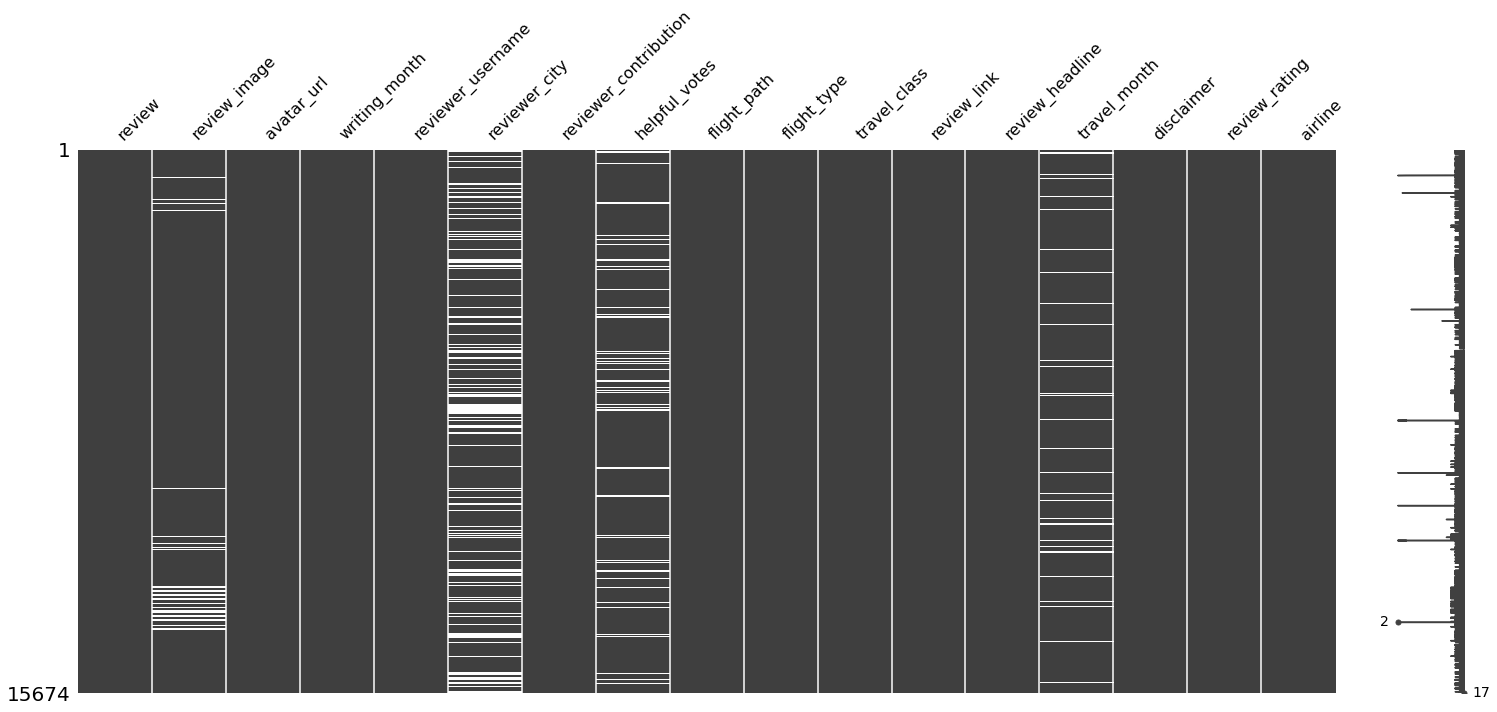

In [18]:
# Check for Missing Values
msno.matrix(df)

### **Dataset Description**

In [19]:
# Checking dataframe description
df.describe(include='all')

review         review_image           avatar_url  \
count                 15674                14889                15648   
unique                15526                 4756                13543   
top     i flew round tri...  https://media-cd...  https://www.trip...   
freq                     14                  171                   34   

              writing_month  reviewer_username        reviewer_city  \
count                 15641              15639                12395   
unique                14720              12932                 3438   
top     Angela S wrote a...  Safariafficionado  Johannesburg, So...   
freq                     14                 34                  539   

       reviewer_contribution   helpful_votes          flight_path  \
count                 15639            14012                15634   
unique                 1066              538                 3003   
top          1 contribution   1 helpful vote  Johannesburg - C...   
freq                   1292             1372                  303   

          flight_type travel_class          review_link review_headline  \
count           15636        15618                15640           15639   
unique             25           13                15490           13190   
top     International      Economy  https://www.trip...     Good flight   
freq             9955        13261                   14              63   

               travel_month           disclaimer        review_rating  \
count                 14812                15639                15640   
unique                  111                   14                   14   
top     Date of travel: ...  This review is t...  ui_bubble_rating...   
freq                    536                15626                 4209   

                    airline  
count                 15674  
unique                   10  
top     South African Ai...  
freq                   2866

In [20]:
#Getting the total number of reviews in the dataset
n_reviews = df.shape[0]
# print('Number of customer reviews in the dataset: {}'.format(n_reviews))

### **Initial Data Cleaning: Overlapped Text**

In [21]:
# Initial dataset cleaning to support exploration
def remove_overlapped_text(df):
  df = df.copy()
  index = df[(df["travel_class"] != "Economy") & (df["travel_class"] != "Business Class") & (df["travel_class"] != "First Class")].index 
  df.drop(index, inplace=True)
  df.reset_index(drop=True, inplace=True)
  return df

df = remove_overlapped_text(df)
df.shape

(15605, 17)

## **Data Exploration: Focused on Non-Review Columns**

### **Total Number of Reviews by Airlines**

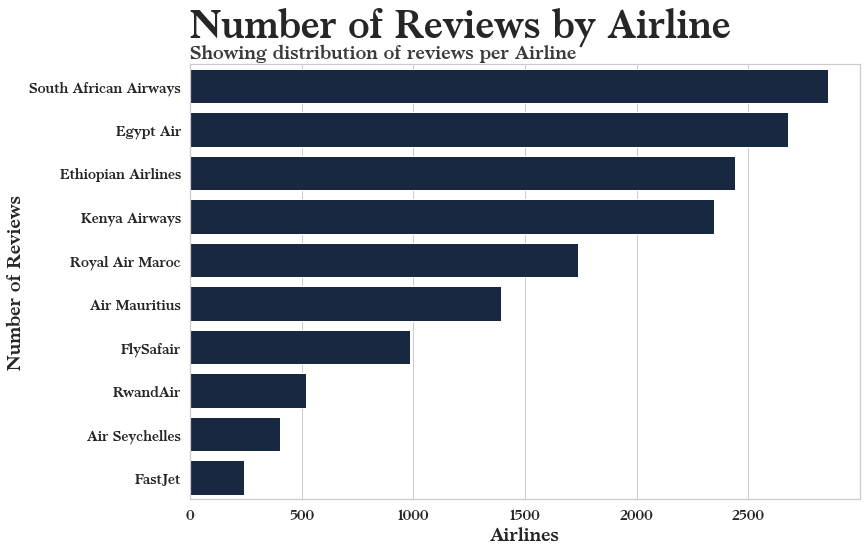

In [22]:
import matplotlib.font_manager as fm
viz_color = "#102747"

# path = '/usr/share/fonts/truetype/IBMPlexSans-Regular.ttf'
path = '/usr/share/fonts/truetype/Bower-Bold.otf'
fontprop = fm.FontProperties(fname=path)


sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))

plt.suptitle("Number of Reviews by Airline", ha='left', fontproperties=fontprop, fontsize=40, x=0.125, y=0.98)
plt.title("Showing distribution of reviews per Airline", loc='left',alpha=0.9, fontproperties=fontprop, fontsize=20)

sns.countplot(data=df, y="airline", ax=ax, color=viz_color, order=df['airline'].value_counts().index)

plt.xticks(fontproperties=fontprop, fontsize=15)
plt.yticks(fontproperties=fontprop, fontsize=15)
plt.xlabel('Airlines', fontproperties=fontprop, fontsize=20)
plt.ylabel('Number of Reviews', fontproperties=fontprop, fontsize=20)

# ax.set(ylabel="Airlines", xlabel="Number of Reviews")

plt.show()

### **Flight Types or Regions Travelled by Reviewers for Each Airline**

In [23]:
# What are the most common flight types across the various airlines experience by reviewers?
airline_flight_type = df.groupby(['airline', 'flight_type']).size().reset_index().pivot(columns='flight_type', index='airline', values=0)
airline_flight_type

flight_type           Africa  Asia  Domestic  Europe  International  \
airline                                                               
Air Mauritius            410     0        19       0            961   
Egypt Air                 51     1       338       4           2127   
Ethiopian Airlines       417     2        52       6           1910   
FastJet                  118     0       122       0              1   
FlySafair                  3     0       975       0              8   
Kenya Airways            861     3       116       0           1353   
Royal Air Maroc           37     0        66       0           1585   
RwandAir                 303     1         1       0            211   
Air Seychelles           139     0        35       0            229   
South African Air...     771     1       525       1           1558   

flight_type           Middle East  North Africa  North Asia  Russia  \
airline                                                               
Air Mauritius                   0             0           0       0   
Egypt Air                       2           156           0       0   
Ethiopian Airlines              0            35           2       0   
FastJet                         0             0           0       0   
FlySafair                       0             0           0       0   
Kenya Airways                   0             7           2       0   
Royal Air Maroc                 0            50           0       1   
RwandAir                        0             1           2       0   
Air Seychelles                  0             0           0       0   
South African Air...            0             1           0       0   

flight_type           South America  Southeast Asia  
airline                                              
Air Mauritius                     0               3  
Egypt Air                         0               1  
Ethiopian Airlines                6               9  
FastJet                           0               0  
FlySafair                         0               0  
Kenya Airways                     0               6  
Royal Air Maroc                   0               0  
RwandAir                          0               0  
Air Seychelles                    0               0  
South African Air...              0               0

### **Distribution of Ratings (1 -5)**

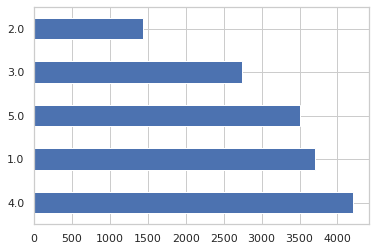

In [24]:
# What is the distribution of Ratings in the review dataset??
# Clean up review rating & convert column into ratings / interger
df.review_rating = df.review_rating.str[-2:]
df.review_rating = df.review_rating.astype(int) / 10
df.review_rating.value_counts().plot(kind="barh")

### **Average Rating Across the Airlines for the Various Travel Classes**

In [25]:
# Whats the average rating experience by travellers within KQ and across the various airlines in the different classes?
import numpy as np

plt.figure(figsize=(12, 8), dpi= 80)
airline_class_review = df.groupby(['airline', 'travel_class']).agg({'review_rating':[np.mean]}).reset_index().pivot(columns="travel_class", index="airline").droplevel(0, axis=1).droplevel(0, axis=1) 
airline_class_review

travel_class          Business Class   Economy  First Class
airline                                                    
Air Mauritius               3.624454  3.238832          NaN
Egypt Air                   3.311475  3.167510     3.052632
Ethiopian Airlines          3.573034  2.936309          NaN
FastJet                          NaN  2.929461          NaN
FlySafair                        NaN  3.898580          NaN
Kenya Airways               3.408377  3.052391          NaN
Royal Air Maroc             2.379032  2.283591          NaN
RwandAir                    3.777778  3.484649          NaN
Air Seychelles              3.595745  3.008427          NaN
South African Air...        3.468007  3.364502          NaN

<Figure size 960x640 with 0 Axes>

### **Data Cleaning: Correcting Travel Month Column**

In [26]:
# Clean Writing Month
df.writing_month = df.writing_month.str[-8:]
df.writing_month

0        Nov 2022
1        Nov 2022
2        Oct 2022
3        Sep 2022
4        Sep 2022
           ...   
15600    Feb 2016
15601    Feb 2016
15602    Feb 2016
15603    Feb 2016
15604    Feb 2016
Name: writing_month, Length: 15605, dtype: object

In [27]:
# Clean Travel Month
df.travel_month = df.travel_month.str[16:]
df.travel_month

0         November 2022
1          October 2022
2          October 2022
3        September 2022
4        September 2022
              ...      
15600     November 2015
15601     December 2015
15602     February 2016
15603      October 2015
15604     December 2015
Name: travel_month, Length: 15605, dtype: object

In [28]:
df['travel_year'] = df.travel_month.str[-4:]
df.travel_year.head()

0    2022
1    2022
2    2022
3    2022
4    2022
Name: travel_year, dtype: object

In [29]:
# Assumptions, due to extraction error, we'll convert 25** years to 2022
df.isna().sum()

review                      0
review_image              765
avatar_url                  0
writing_month               0
reviewer_username           1
reviewer_city            3242
reviewer_contribution       0
helpful_votes            1625
flight_path                 0
flight_type                 0
travel_class                0
review_link                 0
review_headline             1
travel_month              824
disclaimer                  0
review_rating               0
airline                     0
travel_year               824
dtype: int64

### **Exploring Review Ratings by Airline and Flight Travel Class**

Text(84.5, 0.5, 'Airlines')

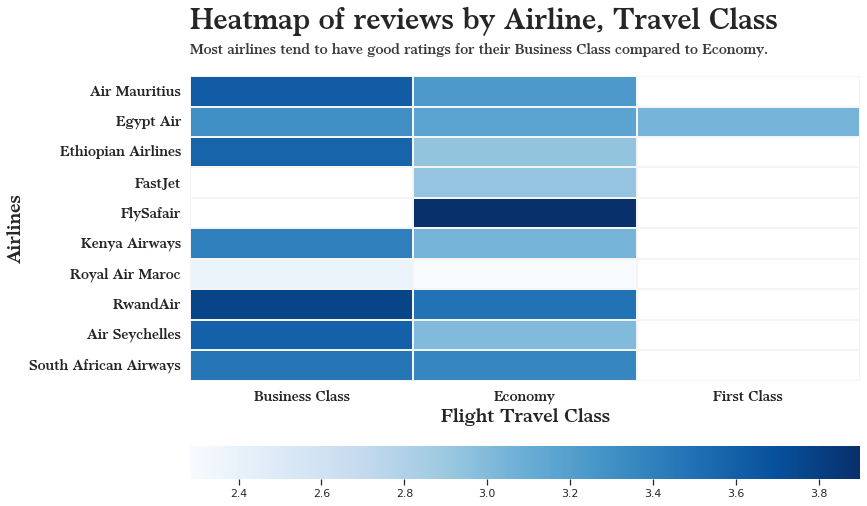

In [30]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))

plt.suptitle("Heatmap of reviews by Airline, Travel Class", ha='left', fontproperties=fontprop, fontsize=30, x=0.125, y=1)
plt.title("Most airlines tend to have good ratings for their Business Class compared to Economy. \n", 
          loc='left', alpha=0.9, fontproperties=fontprop, fontsize=15)

sns.heatmap(airline_class_review, cmap="Blues", linewidth=1, linecolor="#F4F4F4", cbar_kws = {"location":"bottom", "use_gridspec":False})

plt.xticks(fontproperties=fontprop, fontsize=15)
plt.yticks(fontproperties=fontprop, fontsize=15)
plt.xlabel('Flight Travel Class', fontproperties=fontprop, fontsize=20)
plt.ylabel('Airlines', fontproperties=fontprop, fontsize=20)

From the heatmap above, it shows that Travellers have had a great experience with Business Class as opposed to the Economy Class. 
FlySafari is an exception since it only runs flights in the Economy Class.

### **Exploring Review Ratings by Airlines across Regions**

Text(84.5, 0.5, 'Airlines')

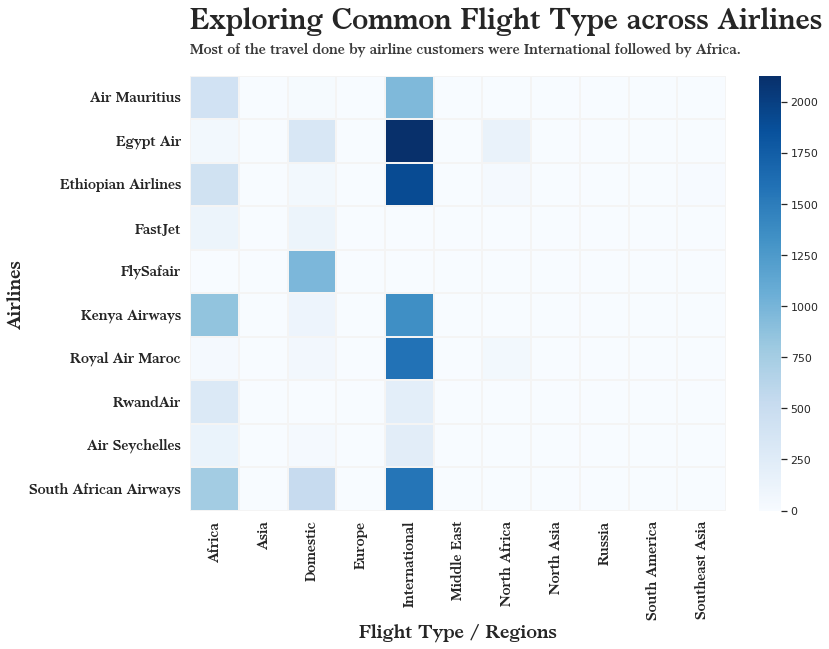

In [31]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))

plt.suptitle("Exploring Common Flight Type across Airlines", ha='left', fontproperties=fontprop, fontsize=30, x=0.125, y=1)
plt.title("Most of the travel done by airline customers were International followed by Africa. \n", 
          loc='left', alpha=0.9, fontproperties=fontprop, fontsize=15)

sns.heatmap(airline_flight_type, cmap="Blues", linewidth=1, linecolor="#F4F4F4")

plt.xticks(fontproperties=fontprop, fontsize=15)
plt.yticks(fontproperties=fontprop, fontsize=15)
plt.xlabel('Flight Type / Regions', fontproperties=fontprop, fontsize=20)
plt.ylabel('Airlines', fontproperties=fontprop, fontsize=20)

From the heatmap above, it shows that most airline travellers took international flights, followed closely by travels to Africa.

### **Breakdown of Airlines by Respective Travel Classes**

In [32]:
airline_travel_class = df.groupby(['airline', 'travel_class']).size().reset_index().pivot(columns='travel_class', index='airline', values=0)
airline_travel_class

travel_class          Business Class  Economy  First Class
airline                                                   
Air Mauritius                    229     1164            0
Egypt Air                        488     2173           19
Ethiopian Airlines               445     1994            0
FastJet                            0      241            0
FlySafair                          0      986            0
Kenya Airways                    382     1966            0
Royal Air Maroc                  124     1615            0
RwandAir                          63      456            0
Air Seychelles                    47      356            0
South African Air...             547     2310            0

Text(0, 0.5, 'Airlines')

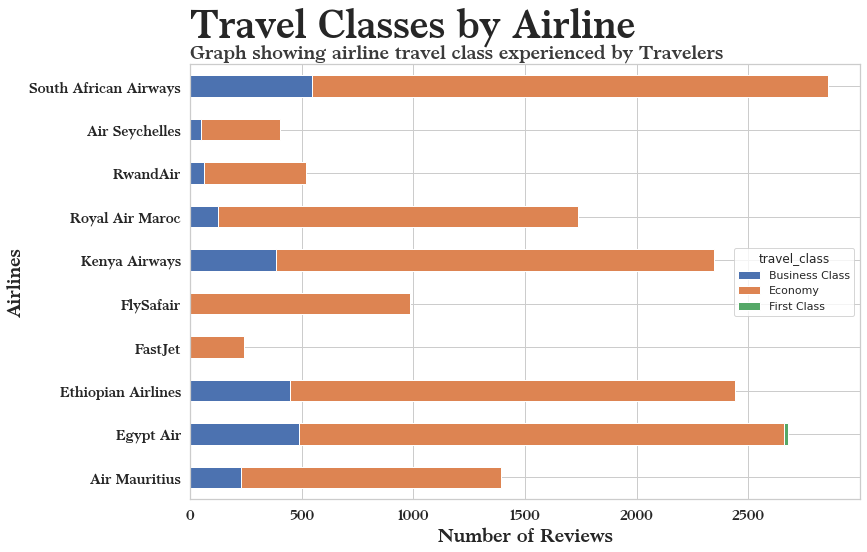

In [33]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))

plt.suptitle("Travel Classes by Airline", ha='left', fontproperties=fontprop, fontsize=40, x=0.125, y=0.98)
plt.title("Graph showing airline travel class experienced by Travelers", loc='left',alpha=0.9, fontproperties=fontprop, fontsize=20)

airline_travel_class.plot(kind="barh", stacked=True, ax=ax, )

plt.xticks(fontproperties=fontprop, fontsize=15)
plt.yticks(fontproperties=fontprop, fontsize=15)
plt.xlabel('Number of Reviews', fontproperties=fontprop, fontsize=20)
plt.ylabel('Airlines', fontproperties=fontprop, fontsize=20)

Text(0, 0.5, 'Flight Paths')

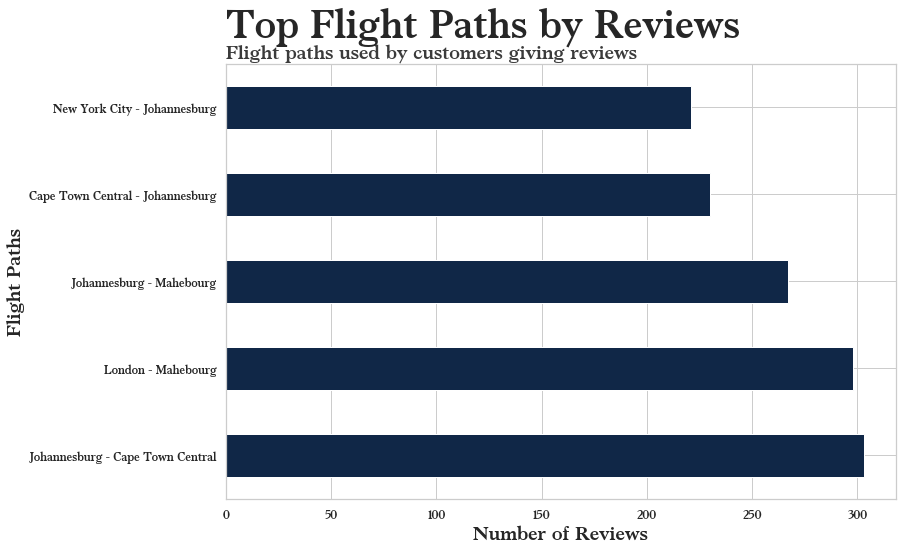

In [34]:
fig, ax = plt.subplots(figsize=(12,8))

plt.suptitle("Top Flight Paths by Reviews", ha='left', fontproperties=fontprop, fontsize=40, x=0.125, y=0.98)
plt.title("Flight paths used by customers giving reviews", loc='left',alpha=0.9, fontproperties=fontprop, fontsize=20)

plt.xticks(fontproperties=fontprop, fontsize=12)
plt.yticks(fontproperties=fontprop, fontsize=12)

df.flight_path.value_counts()[:5].plot(kind='barh', color=viz_color)

plt.xlabel('Number of Reviews', fontproperties=fontprop, fontsize=20)
plt.ylabel('Flight Paths', fontproperties=fontprop, fontsize=20)

In [35]:
df.describe()

review_rating
count   15605.000000
mean        3.151169
std         1.479597
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000

## **Data Exploration: Focused on Review Text**

At this step we drill down into the Review Text, Extract text features and perform an exploratory analysis from the extracted features. This feature will then be used downstream in Modelling Stage.

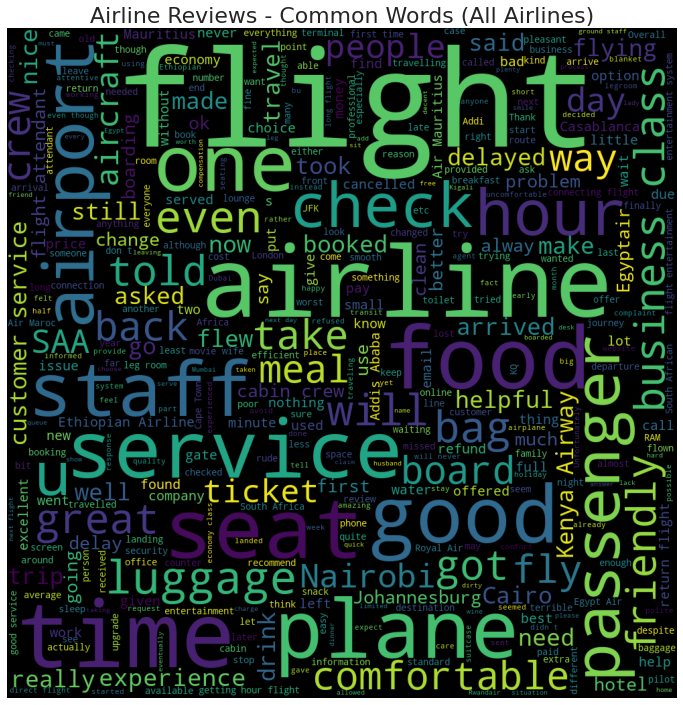

In [36]:
# Checking on the Word Cloud for Each Review Rating
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color = 'black',
    stopwords = stopwords, 
    max_words = 400,
    max_font_size = 200,
    width=1000, height=1000,
    random_state = 42
).generate(" ".join(df["review"].astype('str')))

fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("Airline Reviews - Common Words (All Airlines)", fontsize=22)
plt.axis('off')
plt.show()

In [37]:
df.review_rating

0        4.0
1        1.0
2        5.0
3        1.0
4        4.0
        ... 
15600    4.0
15601    4.0
15602    3.0
15603    4.0
15604    3.0
Name: review_rating, Length: 15605, dtype: float64

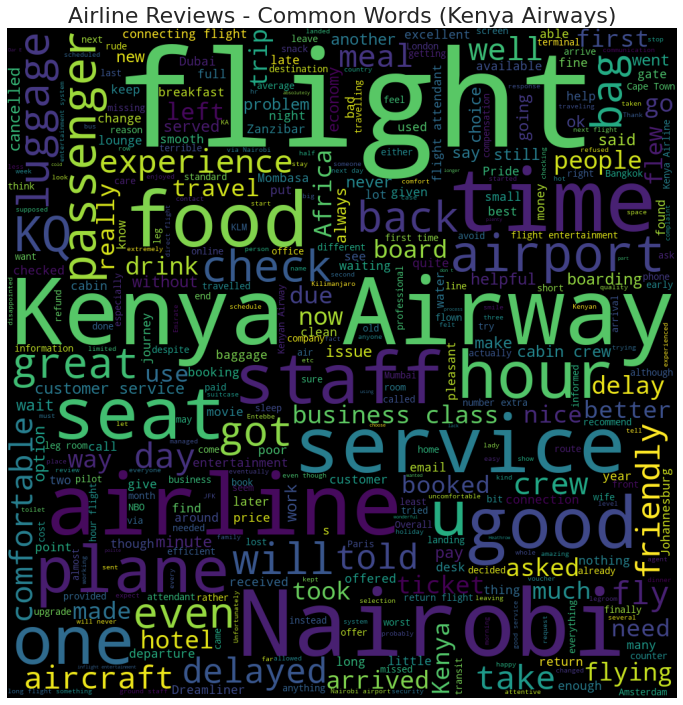

In [38]:
# Checking on the Word Cloud for Each Review Rating
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color = 'black',
    stopwords = stopwords, 
    max_words = 400,
    max_font_size = 200,
    width=1000, height=1000,
    random_state = 42
).generate(" ".join(df[df.airline == 'Kenya Airways']["review"].astype('str')))

fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("Airline Reviews - Common Words (Kenya Airways)", fontsize=22)
plt.axis('off')
plt.show()

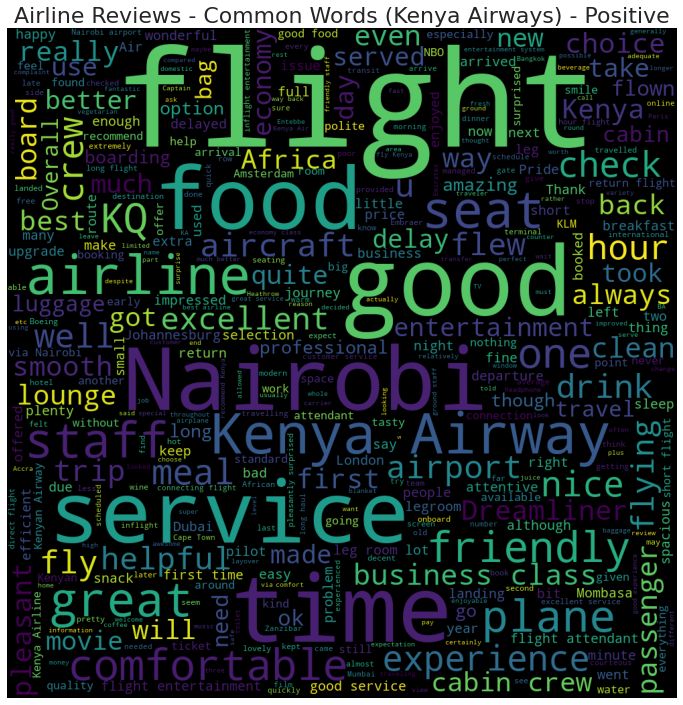

In [39]:
# Checking on the Word Cloud for Each Review Rating
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color = 'black',
    stopwords = stopwords, 
    max_words = 400,
    max_font_size = 200,
    width=1000, height=1000,
    random_state = 42
).generate(" ".join(df[(df.airline == 'Kenya Airways') & (df.review_rating >= 4)]["review"].astype('str')))

fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("Airline Reviews - Common Words (Kenya Airways) - Positive", fontsize=22)
plt.axis('off')
plt.show()

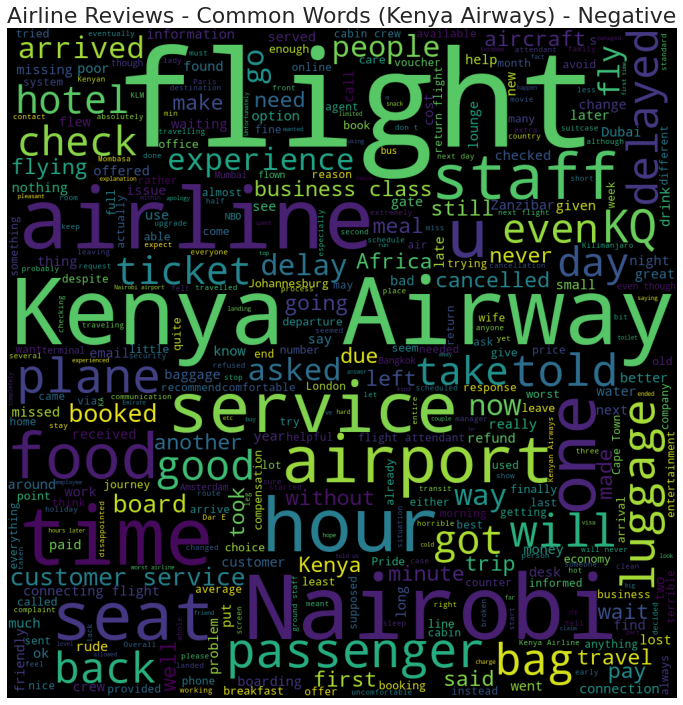

In [40]:
# Checking on the Word Cloud for Each Review Rating
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color = 'black',
    stopwords = stopwords, 
    max_words = 400,
    max_font_size = 200,
    width=1000, height=1000,
    random_state = 42
).generate(" ".join(df[(df.airline == 'Kenya Airways') & (df.review_rating < 4)]["review"].astype('str')))

fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("Airline Reviews - Common Words (Kenya Airways) - Negative", fontsize=22)
plt.axis('off')
plt.show()

In [41]:
# From the Dataframe we fetch the Review Column and peform text profilling.
text_nlp = pd.DataFrame(df, columns=['review'])
# Exploring a Sample Review
text_nlp["review"][0]

'My return trip was - out on Monday and back on Friday! A seamless flight which kept time during both legs, overseen by efficient, courteous staff. The snacks were fresh. However, there is a need to watch the high sugar and salt content. There was a slight muddle at check-in in Victoria Falls over ticketing, but that was swiftly resolved. A bonus on the trip was flying over the Falls on the way from Victoria Falls- a spectacular sight! Fastjet is a small and efficient airline which makes the round trip worth repeating.'

In [42]:
%%script echo skipping
# We'll skip this step due to the execution timeline on the notebook.
# As an alternative we have saved the files from this output into .csv so that
# we only read directly from the CSV files.
profile_data = apply_text_profiling(
    text_nlp, 'review', 
    params={'spelling_check': False,
            'grammar_check': False,
            'ease_of_reading_check':False,
            'parallelisation_method': 'default'})

# Generating a profiling report into HTML
profile_text = ProfileReport(profile_data)
profile_text.to_file("airline-review-text-profiler-form.html")

# Saving the profiled data to CSV to save on execution
profile_data.to_csv("airline-review-text-profiled-dataset.csv")

skipping


In [43]:
profile_data = pd.read_csv("https://raw.githubusercontent.com/billyotieno/analytics-datasets/main/Transport%20Services/Airlines/airline-review-text-profiled-dataset.csv")

In [44]:
# Dropping the Unnamed: 0 column created during file export
profile_data.drop(["Unnamed: 0"], axis=1, inplace=True)
profile_data.columns

Index(['review', 'sentences_count', 'characters_count',
       'repeated_letters_count', 'spaces_count', 'chars_excl_spaces_count',
       'repeated_spaces_count', 'whitespaces_count',
       'chars_excl_whitespaces_count', 'repeated_whitespaces_count',
       'count_words', 'duplicates_count', 'emoji_count',
       'repeated_digits_count', 'whole_numbers_count', 'alpha_numeric_count',
       'non_alpha_numeric_count', 'punctuations_count',
       'repeated_punctuations_count', 'stop_words_count', 'dates_count',
       'noun_phrase_count', 'english_characters_count',
       'non_english_characters_count', 'syllables_count',
       'sentiment_polarity_score', 'sentiment_polarity',
       'sentiment_polarity_summarised', 'sentiment_subjectivity_score',
       'sentiment_subjectivity', 'sentiment_subjectivity_summarised'],
      dtype='object')

In [45]:
# Check the datatypes of the newly created 
profile_data.dtypes

review                                object
sentences_count                        int64
characters_count                       int64
repeated_letters_count                 int64
spaces_count                           int64
chars_excl_spaces_count                int64
repeated_spaces_count                  int64
whitespaces_count                      int64
chars_excl_whitespaces_count           int64
repeated_whitespaces_count             int64
count_words                            int64
duplicates_count                       int64
emoji_count                            int64
repeated_digits_count                  int64
whole_numbers_count                    int64
alpha_numeric_count                    int64
non_alpha_numeric_count                int64
punctuations_count                     int64
repeated_punctuations_count            int64
stop_words_count                       int64
dates_count                            int64
noun_phrase_count                      int64
english_ch

In [46]:
# Comparing Common Words used by Different Airlines - we'll use df for this
df.columns

Index(['review', 'review_image', 'avatar_url', 'writing_month',
       'reviewer_username', 'reviewer_city', 'reviewer_contribution',
       'helpful_votes', 'flight_path', 'flight_type', 'travel_class',
       'review_link', 'review_headline', 'travel_month', 'disclaimer',
       'review_rating', 'airline', 'travel_year'],
      dtype='object')

In [47]:
# Summary of key text statistics
print("Number of Emojis in Corpus - ", profile_data["emoji_count"].sum())
print("Number of Punctuations in Corpus - ", profile_data["punctuations_count"].sum())
print("Number of Stop Words in Corpus - ", profile_data["stop_words_count"].sum())
print("Number of Dates in Corpus - ", profile_data["dates_count"].sum())
print("Number of Non-English Character in Corpus - ", profile_data["non_english_characters_count"].sum())
print("Number of Repeated Whitespaces in Corpus - ", profile_data["repeated_whitespaces_count"].sum())

Number of Emojis in Corpus -  690
Number of Punctuations in Corpus -  205480
Number of Stop Words in Corpus -  689755
Number of Dates in Corpus -  36
Number of Non-English Character in Corpus -  6975
Number of Repeated Whitespaces in Corpus -  20143


### **Checking for NaNs in Extracted Review Columns**

In [48]:
# Percentage of non-null values.
filling_rates = 100.*profile_data.count().sort_values(ascending=False)/profile_data.shape[0]
print(filling_rates)

review                               100.0
non_alpha_numeric_count              100.0
sentiment_subjectivity               100.0
sentiment_subjectivity_score         100.0
sentiment_polarity_summarised        100.0
sentiment_polarity                   100.0
sentiment_polarity_score             100.0
syllables_count                      100.0
non_english_characters_count         100.0
english_characters_count             100.0
noun_phrase_count                    100.0
dates_count                          100.0
stop_words_count                     100.0
repeated_punctuations_count          100.0
punctuations_count                   100.0
alpha_numeric_count                  100.0
sentences_count                      100.0
whole_numbers_count                  100.0
repeated_digits_count                100.0
emoji_count                          100.0
duplicates_count                     100.0
count_words                          100.0
repeated_whitespaces_count           100.0
chars_excl_

In [49]:
values_filling_rates = filling_rates.values
text_filling_rates = filling_rates.index.to_list()
print(text_filling_rates)

['review', 'non_alpha_numeric_count', 'sentiment_subjectivity', 'sentiment_subjectivity_score', 'sentiment_polarity_summarised', 'sentiment_polarity', 'sentiment_polarity_score', 'syllables_count', 'non_english_characters_count', 'english_characters_count', 'noun_phrase_count', 'dates_count', 'stop_words_count', 'repeated_punctuations_count', 'punctuations_count', 'alpha_numeric_count', 'sentences_count', 'whole_numbers_count', 'repeated_digits_count', 'emoji_count', 'duplicates_count', 'count_words', 'repeated_whitespaces_count', 'chars_excl_whitespaces_count', 'whitespaces_count', 'repeated_spaces_count', 'chars_excl_spaces_count', 'spaces_count', 'repeated_letters_count', 'characters_count', 'sentiment_subjectivity_summarised']


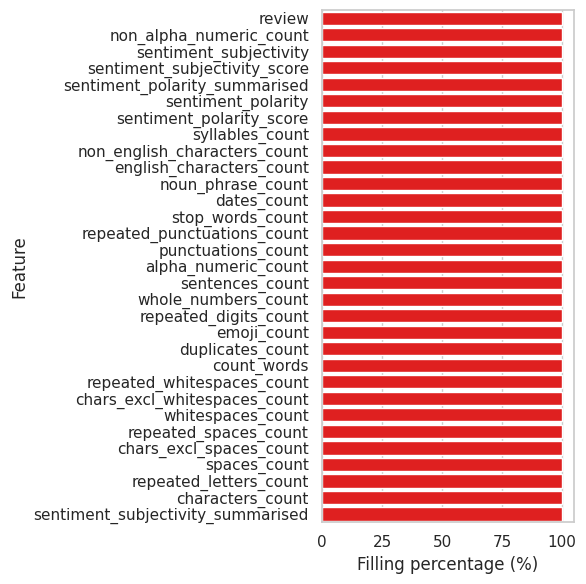

In [50]:
plt.figure(figsize=(6,6),dpi=100)
sns.set(style="whitegrid")
ax = sns.barplot(x=values_filling_rates, y=text_filling_rates,color="Red")
ax.set(xlabel='Filling percentage (%)', ylabel='Feature')
plt.tight_layout()
plt.show()

### **Features distributions into Boolean, Categorical and Numerical types**

In [51]:
df_for_training = profile_data.copy()

In [52]:
cols_for_training = df_for_training.columns.to_list()

In [53]:
feats_bool = ['recommended',
              'has_layover']
feats_cat = ['airline',
             'traveller_type',
             'cabin','review_text', 'review',
             'pos_neu_neg_review_score']
feats_num = [feat for feat in cols_for_training if feat not in feats_bool and feat not in feats_cat]

In [54]:
print('Boolean features: \n{}\n'.format(feats_bool))
print('Categorical features: \n{}\n'.format(feats_cat))
print('Numerical features: \n{}\n'.format(feats_num))

Boolean features: 
['recommended', 'has_layover']

Categorical features: 
['airline', 'traveller_type', 'cabin', 'review_text', 'review', 'pos_neu_neg_review_score']

Numerical features: 
['sentences_count', 'characters_count', 'repeated_letters_count', 'spaces_count', 'chars_excl_spaces_count', 'repeated_spaces_count', 'whitespaces_count', 'chars_excl_whitespaces_count', 'repeated_whitespaces_count', 'count_words', 'duplicates_count', 'emoji_count', 'repeated_digits_count', 'whole_numbers_count', 'alpha_numeric_count', 'non_alpha_numeric_count', 'punctuations_count', 'repeated_punctuations_count', 'stop_words_count', 'dates_count', 'noun_phrase_count', 'english_characters_count', 'non_english_characters_count', 'syllables_count', 'sentiment_polarity_score', 'sentiment_polarity', 'sentiment_polarity_summarised', 'sentiment_subjectivity_score', 'sentiment_subjectivity', 'sentiment_subjectivity_summarised']



### **Plotting the correlation matrix for the features**

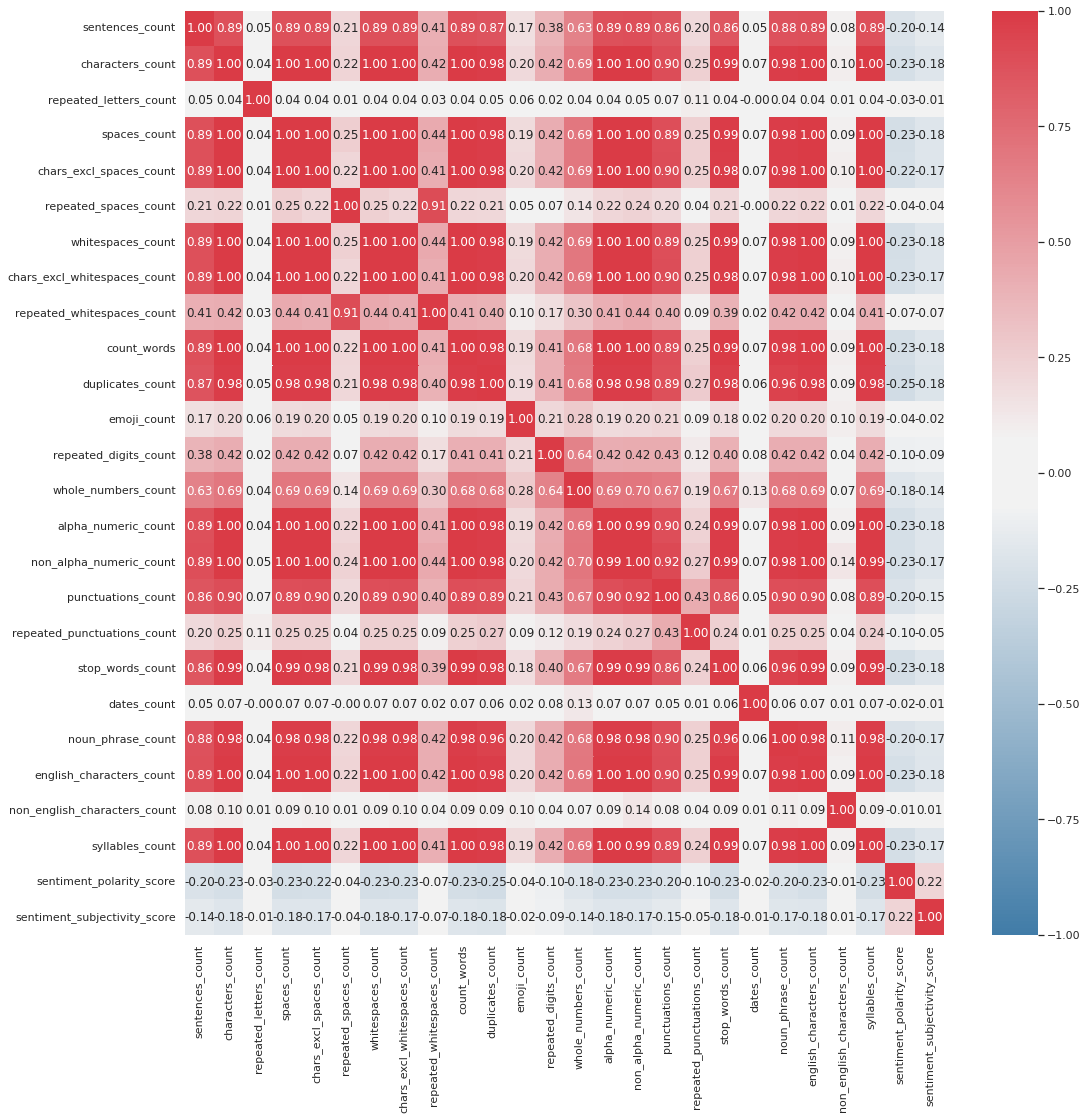

In [55]:
# Let's plot a correlation matrix among the features
def plot_cmap(matrix_values, figsize_w, figsize_h, filename):
    """
    Plot a heatmap corresponding to the input values.
    """
    if figsize_w is not None and figsize_h is not None:
        plt.figure(figsize=(figsize_w,figsize_h))
    else:
        plt.figure()
    cmap = sns.diverging_palette(240, 10, sep=20, as_cmap=True)
    sns.heatmap(matrix_values, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1)
    plt.savefig(filename)
    plt.show()
    return cmap

corr_values = df_for_training[feats_num].dropna(axis=0,how='any').corr()
plot_cmap(matrix_values=corr_values, 
          figsize_w=17, 
          figsize_h=17, 
          filename='./Corr.png')

Note:

1. A positive correlation between the different types of review scores and subscores
2. A negative correlation between the length of the review text and the value of the different types of review scores and subscores
3. The similarity between using the number of characters and the number of words, from which we conclude that we can drop one of the two features

In [56]:
# Based on the Correlation Matrix - Checking the Columnns to be Dropped
corr_matrix = profile_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

to_drop

['spaces_count',
 'chars_excl_spaces_count',
 'whitespaces_count',
 'chars_excl_whitespaces_count',
 'count_words',
 'duplicates_count',
 'alpha_numeric_count',
 'non_alpha_numeric_count',
 'stop_words_count',
 'noun_phrase_count',
 'english_characters_count',
 'syllables_count']

## **Data Quality Summary**

As an output of our Data Exploration efforts we have been able to identify the following Data Quality Issues within the Review Text and additional columns from the datasets. Below is a summary of our Data Quality findings which informs our Data Preparation Stage:

**Data Quality Issues Identified in Non-Review Text Columns**

> - *Redundant Columns*   
> - *Duplicate Rows*  
> - *Wrong Data Types* 
> - *Missing Values*

**Data Quality Issues Identified in Review Text**

> - *Extra Whitespaces in Text*. 
> - *Digitis in Review Text*.  
> - *Existing Emoji's in Review Text*.  
> - *Punctuations*.  
> - *URL's*.  

For the review text, the data will be cleaned up at part of text pre-processing.

## **Data Preparation**

At this stage we prepare the data for modelling and further analysis.

### **1. Merging the two Datasets - Text Profiled & Non-Review Dataset**

In [57]:
# profile_data
profile_data["id"] = profile_data.index
df["id"] = df.index

In [58]:
review_df = pd.merge(df, profile_data, how="left", on="id")
review_df.shape

(15605, 50)

In [59]:
df.shape

(15605, 19)

In [60]:
profile_data.shape

(15605, 32)

In [61]:
review_df.columns

Index(['review_x', 'review_image', 'avatar_url', 'writing_month',
       'reviewer_username', 'reviewer_city', 'reviewer_contribution',
       'helpful_votes', 'flight_path', 'flight_type', 'travel_class',
       'review_link', 'review_headline', 'travel_month', 'disclaimer',
       'review_rating', 'airline', 'travel_year', 'id', 'review_y',
       'sentences_count', 'characters_count', 'repeated_letters_count',
       'spaces_count', 'chars_excl_spaces_count', 'repeated_spaces_count',
       'whitespaces_count', 'chars_excl_whitespaces_count',
       'repeated_whitespaces_count', 'count_words', 'duplicates_count',
       'emoji_count', 'repeated_digits_count', 'whole_numbers_count',
       'alpha_numeric_count', 'non_alpha_numeric_count', 'punctuations_count',
       'repeated_punctuations_count', 'stop_words_count', 'dates_count',
       'noun_phrase_count', 'english_characters_count',
       'non_english_characters_count', 'syllables_count',
       'sentiment_polarity_score', 'sent

In [62]:
review_df.isna().sum()

review_x                                0
review_image                          765
avatar_url                              0
writing_month                           0
reviewer_username                       1
reviewer_city                        3242
reviewer_contribution                   0
helpful_votes                        1625
flight_path                             0
flight_type                             0
travel_class                            0
review_link                             0
review_headline                         1
travel_month                          824
disclaimer                              0
review_rating                           0
airline                                 0
travel_year                           824
id                                      0
review_y                                0
sentences_count                         0
characters_count                        0
repeated_letters_count                  0
spaces_count                      

In [63]:
review_df.describe()

review_rating            id  sentences_count  characters_count  \
count   15605.000000  15605.000000     15605.000000      15605.000000   
mean        3.151169   7802.000000         6.341749        564.337969   
std         1.479597   4504.919811         5.943220        605.470204   
min         1.000000      0.000000         1.000000         16.000000   
25%         2.000000   3901.000000         3.000000        216.000000   
50%         3.000000   7802.000000         5.000000        378.000000   
75%         4.000000  11703.000000         8.000000        687.000000   
max         5.000000  15604.000000       109.000000       9903.000000   

       repeated_letters_count  spaces_count  chars_excl_spaces_count  \
count         15605.000000     15605.000000         15605.000000       
mean              0.009676       100.916437           463.421532       
std               0.126965       110.840930           495.027976       
min               0.000000         2.000000            14.000000       
25%               0.000000        37.000000           178.000000       
50%               0.000000        67.000000           311.000000       
75%               0.000000       124.000000           564.000000       
max               6.000000      1811.000000          8131.000000       

       repeated_spaces_count  whitespaces_count  chars_excl_whitespaces_count  \
count         15605.000000         15605.000000         15605.000000            
mean              0.839731           102.455687           461.882281            
std               3.480327           112.913840           492.884620            
min               0.000000             2.000000            14.000000            
25%               0.000000            37.000000           178.000000            
50%               0.000000            68.000000           310.000000            
75%               0.000000           126.000000           562.000000            
max             273.000000          1828.000000          8092.000000            

       ...  punctuations_count  repeated_punctuations_count  stop_words_count  \
count  ...        15605.000000         15605.000000              15605.000000   
mean   ...           13.167574             0.375457                 44.200897   
std    ...           15.124653             1.341736                 50.890210   
min    ...            0.000000             0.000000                  0.000000   
25%    ...            5.000000             0.000000                 15.000000   
50%    ...            9.000000             0.000000                 29.000000   
75%    ...           16.000000             0.000000                 54.000000   
max    ...          303.000000            56.000000                864.000000   

        dates_count  noun_phrase_count  english_characters_count  \
count  15605.000000       15605.000000         15605.000000        
mean       0.002307          35.917526           563.890996        
std        0.056560          35.670787           604.952409        
min        0.000000           2.000000            16.000000        
25%        0.000000          15.000000           216.000000        
50%        0.000000          25.000000           378.000000        
75%        0.000000          44.000000           686.000000        
max        3.000000         622.000000          9899.000000        

       non_english_characters_count  syllables_count  \
count         15605.000000              15605.000000   
mean              0.446972                137.906632   
std               5.566241                149.290829   
min               0.000000                  3.000000   
25%               0.000000                 52.000000   
50%               0.000000                 92.000000   
75%               0.000000                168.000000   
max             502.000000               2431.000000   

       sentiment_polarity_score  sentiment_subjectivity_score  
count         15605.000000              15605.000000      

In [64]:
review_df.dtypes

review_x                               object
review_image                           object
avatar_url                             object
writing_month                          object
reviewer_username                      object
reviewer_city                          object
reviewer_contribution                  object
helpful_votes                          object
flight_path                            object
flight_type                            object
travel_class                           object
review_link                            object
review_headline                        object
travel_month                           object
disclaimer                             object
review_rating                         float64
airline                              category
travel_year                            object
id                                      int64
review_y                               object
sentences_count                         int64
characters_count                  

### **2. Removing Duplicate Rows**

In [65]:
# Number of Duplicate Rows
print(review_df.duplicated().sum())

0


### **3. Removing Redundant / Unrequired Columns** - Select Data

In [66]:
redundant_columns = ['spaces_count',
 'chars_excl_spaces_count',
 'whitespaces_count',
 'chars_excl_whitespaces_count',
 'count_words',
 'duplicates_count',
 'alpha_numeric_count',
 'non_alpha_numeric_count',
 'stop_words_count',
 'noun_phrase_count',
 'english_characters_count',
 'syllables_count',
 'review_y',
 'review_image',
 'avatar_url',
 'reviewer_username',
 'reviewer_city',
 'helpful_votes',
 'review_link',
 'review_headline',
 'id']

In [67]:
review_df.drop(redundant_columns, axis=1, inplace=True)
review_df.dtypes

review_x                               object
writing_month                          object
reviewer_contribution                  object
flight_path                            object
flight_type                            object
travel_class                           object
travel_month                           object
disclaimer                             object
review_rating                         float64
airline                              category
travel_year                            object
sentences_count                         int64
characters_count                        int64
repeated_letters_count                  int64
repeated_spaces_count                   int64
repeated_whitespaces_count              int64
emoji_count                             int64
repeated_digits_count                   int64
whole_numbers_count                     int64
punctuations_count                      int64
repeated_punctuations_count             int64
dates_count                       

In [68]:
review_df.shape

(15605, 29)

### **4. Cleaning Travel Month & Year** - Select Data

In [69]:
# Replace month abbreviation in writing month
def replace_month_abrev(date_string):
    month_dict = {"Jan ": "January ",
              "Feb ": "February ",
              "Mar ": "March ",
              "Apr ": "April ",
              "May ": "May ",
              "Jun ": "June ",
              "Jul ": "July ",
              "Aug ": "August ",
              "Sep ": "September ",
              "Sept ": "September ",
              "Oct ": "October ",
              "Nov ": "November ",
              "Dec ": "December "}
    # find all dates with abrev
    abrev_found = filter(lambda abrev_month: abrev_month in date_string, month_dict.keys())
    # replace each date with its abbreviation
    for abrev in abrev_found:
        date_string = date_string.replace(abrev, month_dict[abrev])
    # return the modified string (or original if no states were found)
    return date_string

review_df.writing_month = review_df.writing_month.apply(replace_month_abrev)

In [70]:
# Removing all the with wrong travel periods and replacing them with null
review_df[review_df.travel_year >= '2500'].travel_month = None

In [71]:
review_df.loc[review_df.travel_year >= '2500','travel_month'] = review_df.loc[review_df.travel_year >= '2500','writing_month']
review_df.loc[review_df.travel_year >= '2500','travel_month']

4095        March 2019
7663          May 2020
10570    February 2019
11226       March 2018
Name: travel_month, dtype: object

In [72]:
review_df.loc[review_df.travel_year >= '2500', 'travel_year'] = review_df.travel_month.str[-4:]

In [73]:
# Where travel month is missing, we assume the date review was written is the same as the travel month
review_df.travel_month.fillna(review_df.writing_month, inplace=True)
review_df.travel_year.fillna(review_df.writing_month.str[-4:], inplace=True)

In [74]:
review_df[review_df.travel_month.isna()].head()

Empty DataFrame
Columns: [review_x, writing_month, reviewer_contribution, flight_path, flight_type, travel_class, travel_month, disclaimer, review_rating, airline, travel_year, sentences_count, characters_count, repeated_letters_count, repeated_spaces_count, repeated_whitespaces_count, emoji_count, repeated_digits_count, whole_numbers_count, punctuations_count, repeated_punctuations_count, dates_count, non_english_characters_count, sentiment_polarity_score, sentiment_polarity, sentiment_polarity_summarised, sentiment_subjectivity_score, sentiment_subjectivity, sentiment_subjectivity_summarised]
Index: []

[0 rows x 29 columns]

In [75]:
review_df.travel_year.value_counts()

2018    5177
2019    3988
2017    2862
2016    1372
2020     840
2022     691
2021     461
2015     214
Name: travel_year, dtype: int64

In [76]:
# Check again for missing values - No missing values in dataset - Travel is Cleaned.
review_df.isna().sum()

review_x                             0
writing_month                        0
reviewer_contribution                0
flight_path                          0
flight_type                          0
travel_class                         0
travel_month                         0
disclaimer                           0
review_rating                        0
airline                              0
travel_year                          0
sentences_count                      0
characters_count                     0
repeated_letters_count               0
repeated_spaces_count                0
repeated_whitespaces_count           0
emoji_count                          0
repeated_digits_count                0
whole_numbers_count                  0
punctuations_count                   0
repeated_punctuations_count          0
dates_count                          0
non_english_characters_count         0
sentiment_polarity_score             0
sentiment_polarity                   0
sentiment_polarity_summar

In [77]:
# Create new column travel date
review_df["travel_date"] = pd.to_datetime(review_df['travel_month'], format="%B %Y")
review_df.travel_date

0       2022-11-01
1       2022-10-01
2       2022-10-01
3       2022-09-01
4       2022-09-01
           ...    
15600   2015-11-01
15601   2015-12-01
15602   2016-02-01
15603   2015-10-01
15604   2015-12-01
Name: travel_date, Length: 15605, dtype: datetime64[ns]

### **5. DataType Conversion**


At this stage we convert the *reviewer contributions* from string to integer.

In [78]:
review_df.dtypes

review_x                                     object
writing_month                                object
reviewer_contribution                        object
flight_path                                  object
flight_type                                  object
travel_class                                 object
travel_month                                 object
disclaimer                                   object
review_rating                               float64
airline                                    category
travel_year                                  object
sentences_count                               int64
characters_count                              int64
repeated_letters_count                        int64
repeated_spaces_count                         int64
repeated_whitespaces_count                    int64
emoji_count                                   int64
repeated_digits_count                         int64
whole_numbers_count                           int64
punctuations

In [79]:
review_df.reviewer_contribution = \
review_df.reviewer_contribution.str.replace('contributions','').str.replace('contribution','').str.strip()

In [80]:
review_df.reviewer_contribution = review_df.reviewer_contribution.astype(int)

### **6. Review Sentiment - New Column from Rating Scores**

All Ratings >= 4 are classified as "Positive Reviews - 1".    
All Ratings < 4 are classified as "Negative Reviews - 0"

In [81]:
def convert_rating_to_sentiment(rating):
  return 1 if rating >=4 else 0

review_df["review_sentiment"] = review_df.review_rating.apply(convert_rating_to_sentiment)
review_df.review_sentiment.value_counts()

0    7893
1    7712
Name: review_sentiment, dtype: int64

In [82]:
review_df[review_df.airline == 'Kenya Airways']

review_x   writing_month  reviewer_contribution  \
9722   Recently I trave...   November 2022                 2336     
9723   I want to thanks...   November 2022                    1     
9724   not a bad airlin...   November 2022                    1     
9725   Dear Kenya Airwa...   November 2022                    6     
9726   Absolutely appal...   November 2022                   22     
9727   We flew from Hea...   November 2022                  705     
9728   Was travling fro...   November 2022                    9     
9729   After reading th...   November 2022                    4     
9730   Kenya Airways is...   November 2022                    1     
9731   I travelled to L...   November 2022                    2     
9732   If you’re a fore...   November 2022                    1     
9733   Great service an...    October 2022                    1     
9734   As a proud Kenya...    October 2022                    1     
9735   My Thai husband ...    October 2022                    1     
9736   My wife and myse...    October 2022                   36     
9737   If you’re a fore...   November 2022                    1     
9738   Pleasantly surpr...    October 2022                    5     
9739   Kenyan Airways c...    October 2022                    8     
9740   Never ever use t...    October 2022                    1     
9741   Worse service. 6...    October 2022                    1     
9742   We opted for an ...  September 2022                   58     
9743   This airline has...  September 2022                    1     
9744   Used Kenya Airwa...  September 2022                   15     
9745   Old an stinky ai...  September 2022                    7     
9746   The staff at ken...  September 2022                    2     
9747   flight delays/ch...     August 2022                   11     
9748   I arrive at the ...     August 2022                    1     
9749   "The pride of Af...     August 2022                    6     
9750   Thank you Kenyan...     August 2022                    1     
9751   First things fir...     August 2022                    1     
9752   AC doesn't work\...     August 2022                    1     
9753   The Worst Airlin...     August 2022                    1     
9754   This airlines ha...     August 2022                    1     
9755   We have use this...     August 2022                    6     
9756   Worst internatio...       July 2022                    2     
9757   This airline and...       July 2022                    1     
9758   The last half do...       July 2022                    1     
9759   I travelled on K...       July 2022                    1     
9760   My mother had a ...       July 2022                    1     
9761   Check-In at the ...       July 2022                   72     
9762   I was amazed by ...       July 2022                    1     
9763   The experience f...       July 2022                  180     
9764   Nice but needs l...       July 2022                    2     
9765   I have been wait...       July 2022                    1     
9766   It was our 1st f...       July 2022                    3     
9767   I tried to chang...       July 2022                    1     
9768   Flight has been ...       July 2022                    3     
9769   While I had no t...       July 2022                    3     
9770   I wasn't feeling...       July 2022                 4097     
9771   I haven’t even b...       July 2022                    2     
9772   This is the wors...       July 2022                    6     
9773   They cancelled o...       June 2022                    1     
9774   The most comfort...       June 2022                   42     
9775   Flew from entebb...       June 2022                   13     
9776   This is the wors...       June 2022                    3     
9777   The worst flight...       June 2022                   13     
9778   The transit desk...       June 2022                    4     
9779   Flying fr

## **Data Preparation - Text Pre-processing for Reviews**

In [83]:
# Pre-processing Variables Declared
CONTRACTION_MAP = {"ain't": "is not", "aren't": "are not", "can't": "cannot",
                   "can't've": "cannot have", "'cause": "because", "could've": "could have",
                   "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not",
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will",
                   "he'll've": "he he will have", "he's": "he is", "how'd": "how did",
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
                   "I'll've": "I will have", "I'm": "I am", "I've": "I have",
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will",
                   "i'll've": "i will have", "i'm": "i am", "i've": "i have",
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
                   "it'll": "it will", "it'll've": "it will have", "it's": "it is",
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not",
                   "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
                   "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock",
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
                   "she's": "she is", "should've": "should have", "shouldn't": "should not",
                   "shouldn't've": "should not have", "so've": "so have", "so's": "so as",
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have", "that's": "that is",
                   "there'd": "there would", "there'd've": "there would have", "there's": "there is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
                   "they'll've": "they will have", "they're": "they are", "they've": "they have",
                   "to've": "to have", "wasn't": "was not", "we'd": "we would",
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                   "we're": "we are", "we've": "we have", "weren't": "were not",
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                   "what's": "what is", "what've": "what have", "when's": "when is",
                   "when've": "when have", "where'd": "where did", "where's": "where is",
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have",
                   "who's": "who is", "who've": "who have", "why's": "why is",
                   "why've": "why have", "will've": "will have", "won't": "will not",
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
                   "you'll've": "you will have", "you're": "you are", "you've": "you have", "n't": "not"}

PUNCTUATIONS = [
    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
    '/', '[', ']', '>', '%', '=', '#', '*', '+', "\\", "*",  "~", "@", "£",
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤','*']

In [84]:
from nltk.corpus import stopwords
import string
import re 
import nltk

# Text Pre-processing Function
def expand_contractions(sentence, contraction_mapping):

    """Function expands a contraction word within a sentence
       returns a sentence with expanded contraction. example; can't to cannot

    Args:
        sentence (str): A sentence with a contraction word
        contraction_mapping (dict): A list of contraction and their expanded forms.

    Returns:
        str: A string with expanded contractions
    """
    contractions_pattern = re.compile('({})'.format('|'.join(
        contraction_mapping.keys())),
        flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(
            match) else contraction_mapping.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction

    expanded_sentence = contractions_pattern.sub(expand_match, sentence)
    return expanded_sentence


def remove_emojis(text):
    emoj = re.compile("["
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)


def sep_num_words(text):
    """
    Function seperates numbers from words or other characters e.g. 22ABC to 22 ABC
    Args:
        text (str): String of 
    Returns:
        cleaned string with numbers seperated from words and other characters
    """
    return re.sub(r"([0-9]+(\.[0-9]+)?)", r"\1 ", text).strip()


def num_to_word(text):
    """Function converts numbers in review texts into words.

    Args:
        text (str): A review text 

    Returns:
        str: A review text with numbers converted to words.
    """
    p = inflect.engine()
    output_text = []
    for word in text.split():
        if word.isdigit():
          output_text.append(p.number_to_words(word))
        else:
          output_text.append(word)
    return " ".join(output_text)


def classify_reviews_by_lang(df, review_column="review_x"):
    """Function classifies reviews by language and adds a new column to the dataframe.

    Args:
        df (DataFrame): Reviews DataFrame

    Returns:
        df: A Reviews Dataframe with a new column with classifications.
    """
    # Loading pre-trained language model to identify the review languages - ## The objective is to only focus on english review.
    pre_trained_model = "lid.176.bin"
    lang_model = fasttext.load_model(pre_trained_model)

    # For each review line, I pass it through the model .predict() function with a resulting language - en,de etc.
    detected_lang  = []

    for review in df[review_column]:
        language = lang_model.predict(review)[0]
        detected_lang.append(str(language)[11:13])

    df["review_language"] = detected_lang
    return df


def drop_non_english_languages(df):
    """Function drops all the non-english languages from the DataFrame

    Args:
        df (DataFrame): DataFrame Object

    Returns:
        df: Returns a DataFrame with non-english languages dropped.
    """
    other_language_index = df[(df["review_language"] != 'en')].index
    df = df.drop(other_language_index)
    return df


def remove_punctuation(text, punctuations):
    """Function removes all punctuations from text.

    Args:
        text (str): A string text with or without punctuations.
        punctuations (List): A list of common punctuations.

    Returns:
        str: Returns a string cleaned of punctuations
    """
    for punctuation in punctuations:
        if punctuation in text:
            text = text.replace(punctuation, '')
        return text.strip().lower()

def remove_small_character(token_list, threshold=2):
    return [word for word in token_list if len(word) > threshold]


def remove_punctuation_list(word_token, punctuations):
    """Function removes all punctuations from a List of Tokens.

    Args:
        word_token (List): A list of Word Tokens.
        punctuations (List): A list of punctuations.

    Returns:
        List: A list of word tokens without punctuation tokens.
    """
    for word in word_token:
        if word in punctuations:
          word_token.remove(word)
    return word_token


def remove_stop_words(text):
    """Function removes stop words from word token list.

    Args:
        text (str): Review text corpus. 

    Returns:
        List: A list of word token without stop words.
    """
    stopwords_set = set(stopwords.words('english'))
    return [t for t in text if not t in stopwords_set]


def lemmatize_review(token_list):
    """
    Function takes the lemmatizer object and word_token_list
    Input: Lemmatizer, word_token_list []
    Output: A list of lemmatized word tokens
    Return 
    """
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in token_list]

def remove_punctuations_in_token(token_strings):
  """ Function removes punctuations from a token list.
  """
  return [x for x in token_strings if not re.fullmatch('[' + string.punctuation + ']+', x)]

def preprocess_airline_reviews(df, CONTRACTION_MAP, PUNCTUATIONS):
    """
    Function take Dataframe, Contraction Mapping and Punctuations and returns a cleaned DataFrame
    with Tokenized Review Column
    Args:
        df (DataFrame): A DataFrame Object
        CONTRACTION_MAP (dict): A dictionary of contractions
        PUNCTUATIONS (list): A list of punctuations to remove from text
    Returns: 
        Returns a DataFrame Object
    """
    df = df.copy()
    # create a new review column for initial review column
    df["processed_review_tokens"] = df["review_x"]
    df["processed_review_tokens"] = df["processed_review_tokens"].apply(lambda x: expand_contractions(x, CONTRACTION_MAP))
    df["processed_review_tokens"] = df["processed_review_tokens"].apply(lambda x: sep_num_words(x))
    df["processed_review_tokens"] = df["processed_review_tokens"].apply(lambda x: num_to_word(x))
    df["processed_review_tokens"] = df["processed_review_tokens"].apply(lambda x: remove_emojis(x))

    # Classify reviews by language
    # classify_reviews_by_lang(df, "review_x")
    # Drop non-english reviews
    # drop_non_english_languages(df)

    df["processed_review_tokens"] = df["processed_review_tokens"].apply(lambda x: remove_punctuation(x, PUNCTUATIONS))
    df["processed_review_tokens"] = df["processed_review_tokens"].apply(lambda x: wordpunct_tokenize(x))
    df["processed_review_tokens"] = df["processed_review_tokens"].apply(lambda x: remove_punctuation_list(x, PUNCTUATIONS))
    df["processed_review_tokens"] = df["processed_review_tokens"].apply(lambda x: remove_punctuations_in_token(x))
    df["processed_review_tokens"] = df["processed_review_tokens"].apply(lambda x: remove_small_character(x, threshold=2))
    df["processed_review_tokens"] = df["processed_review_tokens"].apply(lambda x: remove_stop_words(x))
    df["processed_review_tokens"] = df["processed_review_tokens"].apply(lambda x: lemmatize_review(x))

    return df

In [85]:
%%time
review_df = preprocess_airline_reviews(
    review_df,
    CONTRACTION_MAP,
    PUNCTUATIONS
)

CPU times: user 30.5 s, sys: 364 ms, total: 30.9 s
Wall time: 31.1 s


In [86]:
review_df.head()

review_x   writing_month  reviewer_contribution  \
0  My return trip w...   November 2022                  355     
1  So we are freque...   November 2022                    2     
2  Flight FN8001 wa...    October 2022                   42     
3  The 10.30 flight...  September 2022                    2     
4  My boss was on t...  September 2022                    1     

           flight_path flight_type travel_class    travel_month  \
0  Harare - Victori...    Domestic      Economy   November 2022   
1  Harare - Victori...    Domestic      Economy    October 2022   
2  Harare - Victori...    Domestic      Economy    October 2022   
3  Victoria Falls -...      Africa      Economy  September 2022   
4  Bulawayo - Johan...      Africa      Economy  September 2022   

            disclaimer  review_rating  airline  ...  \
0  This review is t...            4.0  FastJet  ...   
1  This review is t...            1.0  FastJet  ...   
2  This review is t...            5.0  FastJet  ...   
3  This review is t...            1.0  FastJet  ...   
4  This review is t...            4.0  FastJet  ...   

  non_english_characters_count  sentiment_polarity_score  sentiment_polarity  \
0                    0                     0.159333          Pretty positive   
1                    0                    -0.014925                  Neutral   
2                    0                     0.433333          Pretty positive   
3                    3                    -0.053750          Pretty negative   
4                    0                     0.331250          Pretty positive   

   sentiment_polarity_summarised  sentiment_subjectivity_score  \
0             Positive                       0.410667            
1              Neutral                       0.372917            
2             Positive                       0.788889            
3             Negative                       0.356250            
4             Positive                       0.475000            

   sentiment_subjectivity  sentiment_subjectivity_summarised  travel_date  \
0  Objective/subjec...     Objective/subjec...                 2022-11-01   
1     Pretty objective               Objective                 2022-10-01   
2    Pretty subjective              Subjective                 2022-10-01   
3     Pretty objective               Objective                 2022-09-01   
4  Objective/subjec...     Objective/subjec...                 2022-09-01   

   review_sentiment  processed_review_tokens  
0                 1  [return, trip, m...      
1                 0  [frequent, flyer...      
2                 1  [flight, fn8001,...      
3                 0  [flight, kruger,...      
4                 1  [bos, last, fast...      

[5 rows x 32 columns]

In [87]:
review_df.iloc[78,-1]

['flying',
 'fastjet',
 'proved',
 'quite',
 'affordable',
 'booked',
 'well',
 'advance',
 'weekend',
 'get',
 'away',
 'flight',
 'quite',
 'comfortable',
 'short',
 'although',
 'sure',
 'could',
 'say',
 'traveling',
 'longer',
 'distance',
 'flight',
 'time',
 'carry',
 'luggage',
 'limited',
 'seven',
 'though']

## **Exploratory Data Analysis / Modelling**
### Building a Quick Sentiment Classifier using CountVectorizer on Airline Reviews

## **Sentiment Analysis Modelling**

### Using CountVectorizer & LogisticsRegression

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer

def dummy_func(doc):
  return doc 

cv = CountVectorizer(
    tokenizer=dummy_func,
    preprocessor=dummy_func
)

X = cv.fit_transform(review_df.processed_review_tokens.to_list())
len(cv.get_feature_names())

In [ ]:
y = review_df.review_sentiment.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = 0.30,
    random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()

model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

### Using TfidfVectorizer & MultinomialNB Model

In [ ]:
# X = review_df.loc[:,"review_x"]
X = review_df.processed_review_tokens.to_list()
y = review_df.loc[:,"review_sentiment"]

from sklearn.feature_extraction.text import TfidfVectorizer
# td = TfidfVectorizer(max_features = 4500)

def dummy_func(doc):
  return doc 

td = TfidfVectorizer(
    tokenizer=dummy_func,
    preprocessor=dummy_func
)


X = td.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training Classifier and Predicting on Test Data
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

## **Topic Modelling**

Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.



In [ ]:
## Topic Modelling using LDA - Latent Diriclet Analysis
## Topic Modelling using LSA - Latent Semantic Analysis
## Topic Modelling using NMF - Non-negative Matrix Factorization

documents = review_df.loc[:,"review_x"]

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 4000

# NMF uses tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words="english")
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [ ]:
# LDA uses raw term counts for LDA because its a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words="english")
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

no_topics = 20

# Run LSA
# SVD represent documents and terms in vectors 
lsa = TruncatedSVD(
    n_components=20, 
    algorithm='randomized', 
    n_iter=100, 
    random_state=122).fit(tfidf)

# Run NMF
nmf = NMF(
    n_components=no_topics, 
    random_state=1, 
    alpha=.1, 
    l1_ratio=.5, 
    init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(
    n_components=no_topics, 
    max_iter=5, 
    learning_method='online', 
    learning_offset=50., 
    random_state=0).fit(tf)

### **Displaying and Evaluating Topics**

In [ ]:
def display_topics(model, feature_names, no_top_words):
  """
  """
  for index, component in enumerate(model.components_):
    zipped = zip(feature_names, component)
    top_terms_key = sorted(
        zipped, 
        key=lambda t:t[1], 
        reverse=True)[:no_top_words]
    top_terms_list = list(dict(top_terms_key).keys())
    print("Topic " + str(index) + ": ", top_terms_list)

In [ ]:
display_topics(nmf, tfidf_feature_names, 10)

In [ ]:
display_topics(lda, tf_feature_names, 10)

In [ ]:
display_topics(lsa, tfidf_feature_names, 10)

In [ ]:
# Model Evaluation
# Model Evaluation Strategies
# 1. Eye Balling Models - Top N words, Topics / Documents
# 2. Intrinsic Evaluation Metrics - Capturing model semantics, Topics interpretability
# 3. Human Judgements - What is a topic?
# 4. Extrinsic Evaluation Metrics / Evaluation at task.
print("Log Likelihood, ", lda.score())
print("Perplexity,", lda.perplexity()) # Optimizing for perplexity may not yield human intepretable results.

In [ ]:
from gensim.models import CoherenceModel
import gensim.corpora as corpora

def get_coherence_value(model, df_column, n_top_words):
    topics = model.components_
    n_top_words = n_top_words
    texts = [[word for word in doc.split()] for doc in df_column]

    # Create the dictionary
    dictionary = corpora.Dictionary(texts)

    # Create a gensim corpus from the word count matrix 
    corpus = [dictionary.doc2bow(text) for text in texts]

    feature_names = [dictionary[i] for i in range(len(dictionary))]

    # Get the top words for each topic from the components_ attribute
    top_words = []
    for topic in topics:
      top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

    coherence_model = CoherenceModel(
        topics=top_words, 
        texts=texts,
        dictionary=dictionary,
        coherence='c_v')
    
    coherence = coherence_model.get_coherence()
    return coherence